[YouTube Link](https://www.youtube.com/watch?v=MJ1vWb1rGwM&t=1s)

**`Import the necessary dependencies`**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # for splitting the data into train and test sets
from sklearn.preprocessing import StandardScaler # for standardizing the train and test set features
from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.metrics import r2_score # r-squared evaluation metric for the linear regression model
import pickle # for saving the ML model and its dependencies as a .plk file for future deployment

**`Load in the Boston House Pricing dataset`**

In [2]:
from sklearn.datasets import load_boston

In [3]:
dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
# 'dataset' object's type
type(dataset)

sklearn.utils.Bunch

In [5]:
# 'dataset' object's keys
print(list(dataset.keys()))

['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module']


In [6]:
# check the description of the 'dataset' object
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# create a DataFrame from the 'dataset' object
X = dataset.data # features
y = dataset.target # target
header = list(dataset.feature_names) # feature names
df = pd.DataFrame(X, columns=header)
df['price'] = y
df.columns = df.columns.str.lower()
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**`Exploratory data analysis`**

In [8]:
# basic information about the 'df' DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
# summary statistics for each feature (and target) in the 'df' DataFrame
# note, setting the 'include' parameter equal to 'all' accounts for categorical features; however, this dataset only contains numeric features
df.describe(include="all")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# output the number of null values for each column (features and target) in the 'df' DataFrame
df_nulls = df.isna().sum().sort_values(ascending=False).reset_index()
df_nulls.columns = ['column', 'n_nulls']
df_nulls

,column,n_nulls
0,crim,0
1,zn,0
2,indus,0
3,chas,0
4,nox,0
5,rm,0
6,age,0
7,dis,0
8,rad,0
9,tax,0


In [11]:
# coefficient of determination (r-squared) matrix between all the features in the 'df' DataFrame
df_rsquared = (df.corr().iloc[:-1, :-1]) ** 2
df_rsquared

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,0.040188,0.165310,0.003124,0.177217,0.048069,0.124421,0.144149,0.391257,0.339614,0.084068,0.148274,0.207591
zn,0.040188,1.000000,0.284973,0.001823,0.266879,0.097338,0.324373,0.441438,0.097311,0.098950,0.153412,0.030807,0.170565
indus,0.165310,0.284973,1.000000,0.003961,0.583164,0.153410,0.415739,0.501302,0.354179,0.519495,0.146879,0.127432,0.364574
chas,0.003124,0.001823,0.003961,1.000000,0.008318,0.008327,0.007485,0.009836,0.000054,0.001266,0.014766,0.002380,0.002908
nox,0.177217,0.266879,0.583164,0.008318,1.000000,0.091318,0.535049,0.591715,0.373860,0.446255,0.035696,0.144438,0.349138
rm,0.048069,0.097338,0.153410,0.008327,0.091318,1.000000,0.057727,0.042126,0.044036,0.085292,0.126381,0.016402,0.376761
age,0.124421,0.324373,0.415739,0.007485,0.535049,0.057727,1.000000,0.559325,0.207956,0.256497,0.068390,0.074821,0.362812
dis,0.144149,0.441438,0.501302,0.009836,0.591715,0.042126,0.559325,1.000000,0.244617,0.285617,0.054043,0.084979,0.247005
rad,0.391257,0.097311,0.354179,0.000054,0.373860,0.044036,0.207956,0.244617,1.000000,0.828515,0.215984,0.197503,0.238805
tax,0.339614,0.098950,0.519495,0.001266,0.446255,0.085292,0.256497,0.285617,0.828515,1.000000,0.212386,0.195194,0.295929


In [ ]:
# output a visualization of the 'df' DataFrame's correlation matrix (note, the target is not included in the visualization)
sns.pairplot(df.drop(df.columns[-1], axis=1));

In [12]:
# identify the highly correlated features, i.e., features with an r-squared greater than 0.8
# note, the 'df_rsquared2' DataFrame shows that only the 'rad' and 'tax' features are highly correlated
df_rsquared2 = df_rsquared.copy(deep=True)
for col in df_rsquared2.columns:
  df_rsquared2[col] = df_rsquared2[col].apply(lambda x: np.nan if (x < 0.8) or (x == 1) else x)

df_rsquared2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828515,NaN,NaN,NaN
tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828515,NaN,NaN,NaN,NaN


In [13]:
# create a dictionary that will contain a feature as the key and a list of the other features that it's highly correlated with as the corresponding value 
correlated_features = {}
for col in df_rsquared2.columns:
  if df_rsquared2[col].sum() > 0:
    correlated_features[col] = list(df_rsquared2[col].dropna().index)

correlated_features

{'rad': ['tax'], 'tax': ['rad']}

In [14]:
# absolute Pearson's correlation coefficient that each feature has with the target 
target = df.columns[-1]
feature_target_corr = np.abs(df.drop(target, axis=1).corrwith(df[target])).sort_values(ascending=False).reset_index()
feature_target_corr.columns = ['feature', 'abs_corr_with_target']
feature_target_corr

,feature,abs_corr_with_target
0,lstat,0.737663
1,rm,0.695360
2,ptratio,0.507787
3,indus,0.483725
4,tax,0.468536
5,nox,0.427321
6,crim,0.388305
7,rad,0.381626
8,age,0.376955
9,zn,0.360445


In [15]:
# the 'rad' and 'tax' features are highly correlated, and the 'tax' feature has a higher correlation with the target, so the 'rad' feature will be dropped from the 'df' DataFrame
# note, this prevents multicollinearity
df.drop('rad', axis=1, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


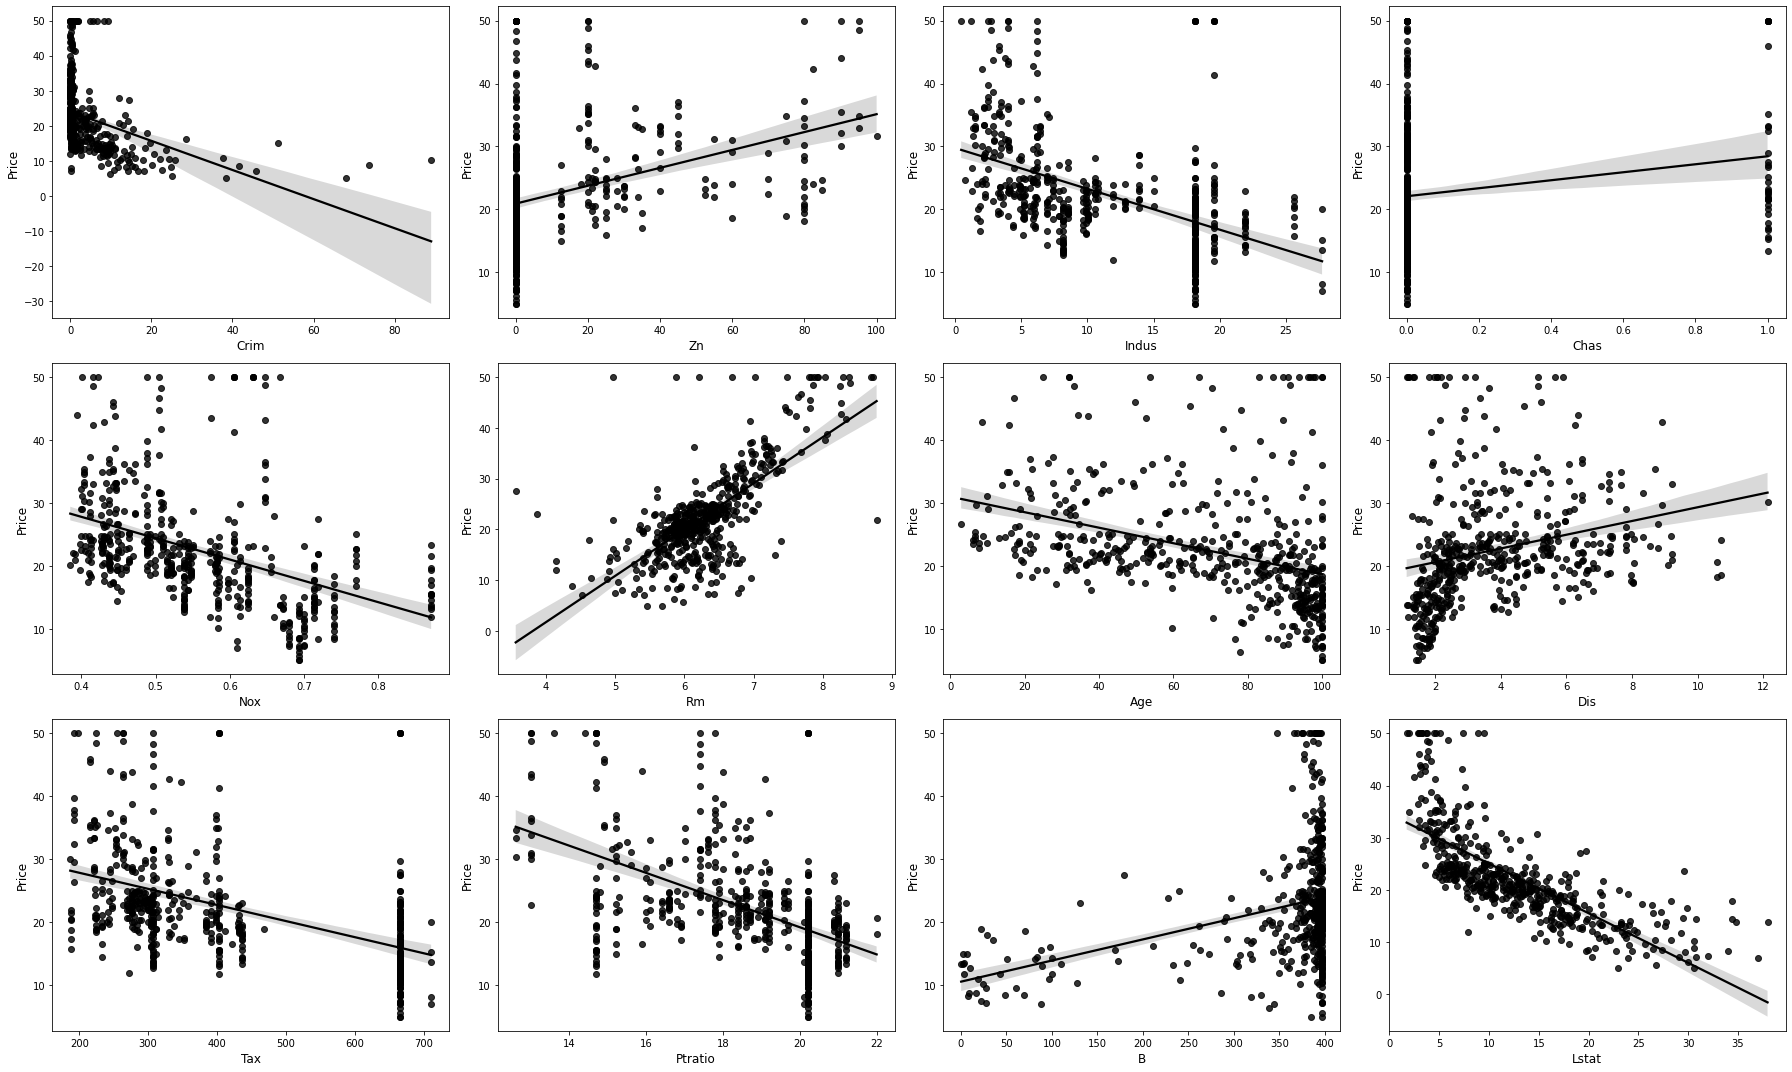

In [16]:
# output a scatterplot between each feature and the target
# note, the below visualization confirms that the 'lstat' and 'rm' features have the highest correlation with the target
target = df.columns[-1]
i = 1
plt.figure(figsize=(25, 15)) # figsize=(x, y)

for col in df.columns[:-1]:
  plt.subplot(3, 4, i)
  sns.regplot(x=col, y=target, data=df, color='black') # seaborn's version of a scatterplot
  # plt.scatter(df[col], df[target], c='black', s=20)
  plt.xlabel(col.title(), fontsize=12)
  plt.ylabel(target.title(), fontsize=12)
  i += 1

plt.tight_layout();

**`Split the data into train and test sets`**

In [17]:
target = df.columns[-1]
Xtrain, Xtest, ytrain, ytest = train_test_split(df.drop(target, axis=1), df[target], test_size=0.3, random_state=42)

In [18]:
Xtrain.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,666.0,20.2,368.74,18.13


In [19]:
Xtest.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,666.0,20.2,385.09,17.27


**`Standardize the train and test set features (train mean and train std are used to prevent data leakage)`**

In [ ]:
# # standardization via manual implementation
# for col in Xtrain.columns:
#   train_mean = Xtrain[col].mean()
#   train_std = Xtrain[col].std()
#   Xtrain[col] = (Xtrain[col] - train_mean) / train_std
#   Xtest[col] = (Xtest[col] - train_mean) / train_std

In [20]:
# standardization via sklearn
# create a 'StandardScaler' object and assign it to the variable 'scaler'
scaler = StandardScaler()

# fit the 'scaler' object to the train set features
# important note, the 'scaler' object takes in as input a DataFrame and outputs a NumPy array of the same shape
scaler.fit(Xtrain)

# standardize the train and test set features
Xtrain = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
Xtest = pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns)

In [21]:
Xtrain.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat
0,-0.414259,-0.505125,-1.292142,-0.281546,-0.851085,0.145264,-0.365584,1.081628,-1.112790,0.187271,0.396514,-1.015316
1,-0.402008,-0.505125,-0.162083,-0.281546,-0.087967,-0.208401,0.133941,-0.487876,0.150088,-0.212090,0.387067,-0.053663
2,-0.397211,-0.505125,-0.609489,-0.281546,-0.936828,-0.896237,-1.266900,0.628596,-1.046639,-0.167716,0.428541,-0.311324
3,-0.290936,-0.505125,-0.431970,-0.281546,-0.165136,-0.543965,-1.429789,0.345133,-0.601625,1.207859,0.312760,-0.822422
4,1.457816,-0.505125,1.005500,-0.281546,0.194987,-0.556496,0.079645,-0.403892,1.557294,0.852872,0.104124,0.803800


In [22]:
Xtest.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat
0,-0.406801,-0.505125,-1.022256,-0.281546,-0.405218,0.125771,0.553831,-0.527348,-0.667776,-0.744571,0.412412,-0.476058
1,-0.411057,1.266629,-0.681651,3.551814,-0.945403,0.601965,-1.299478,0.146831,-0.920352,-0.300837,0.428541,-1.251858
2,-0.405120,-0.505125,2.396785,-0.281546,0.443643,-0.477130,1.085934,-0.893900,1.827911,0.808498,0.350317,0.795352
3,-0.406818,-0.505125,-0.046624,-0.281546,-1.236931,-0.362955,-2.208034,0.716631,-0.613653,0.409138,0.359533,-0.971669
4,0.195119,-0.505125,1.005500,-0.281546,1.335376,-0.039923,0.832552,-0.658340,1.557294,0.852872,0.292484,0.682714


**`Linear regression model: direct solver method`**

In [23]:
# bias feature needs to be added to the train and test sets
features = ['bias'] + list(Xtrain.columns)
Xtrain['bias'], Xtest['bias'] = 1, 1

# convert the 'Xtrain' and 'Xtest' DataFrames into NumPy arrays
Xtrain, Xtest = Xtrain[features].copy(deep=True).values, Xtest[features].copy(deep=True).values

# convert the 'ytrain' and 'ytest' Pandas series into NumPy arrays
ytrain, ytest = ytrain.copy(deep=True).values, ytest.copy(deep=True).values

# Hessian direct solver method for the model's weights (model parameters)
w = np.linalg.solve(Xtrain.T.dot(Xtrain), Xtrain.T.dot(ytrain)) 
w

array([23.01581921, -0.82404407,  0.61106514, -0.06392888,  0.92524917,
       -1.55161796,  3.06899161, -0.40677524, -2.87591624,  0.33725404,
       -1.85690371,  0.95587678, -3.82749521])

In [24]:
# test set predictions (direct solver method)
yhat1_test = Xtest.dot(w)

**`Linear regression model: scikit-learn method`**

In [25]:
# remove the 'bias' feature from both train and test set features as it is not needed for the scikit-learn method
Xtrain = Xtrain[:, 1:]
Xtest = Xtest[:, 1:]

In [26]:
# create an object of the 'LinearRegression' class and assign it to the variable 'model'
linreg_model = LinearRegression()

# fit the 'model' object to the train set
linreg_model.fit(Xtrain, ytrain)

LinearRegression()

In [27]:
# print out the linear regression model's weights
weights = [np.round(i, 4) for i in list(linreg_model.coef_)]
print(f"Weights: {weights}", '\n')

# print out the linear regression model's bias term
print(f"Bias term: {linreg_model.intercept_:.4f}")

Weights: [-0.824, 0.6111, -0.0639, 0.9252, -1.5516, 3.069, -0.4068, -2.8759, 0.3373, -1.8569, 0.9559, -3.8275] 

Bias term: 23.0158


In [28]:
# prinnt out linear regression model's parameters
print(linreg_model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [29]:
# test set predictions (sklearn-learn method)
yhat2_test = linreg_model.predict(Xtest)

**`Model evaluation: Adjusted R-squared`**

In [30]:
# r-squared
r2 = r2_score(ytest, yhat2_test)
print(f"Test set R-squared: {r2:.4f}")

Test set R-squared: 0.6883


In [31]:
# adjusted r-squared
def adj_rsquared(X, y, yhat):
  '''This function takes in as input a feature matrix, X, 
  the target variable, y, and the target variable's predictions, 
  yhat, as input, and outputs the adjusted r-squared between the y
  and yhat.'''
  n = X.shape[0]
  k = X.shape[1]
  t = y - y.mean()
  e = y - yhat
  sst = t.dot(t)
  sse = e.dot(e)
  r2 = 1 - (sse / sst)
  adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - k - 1))
  return adj_r2

In [32]:
print(f"Test set adjusted R-squared: {adj_rsquared(Xtest, ytest, yhat2_test):.4f}")

Test set adjusted R-squared: 0.6614


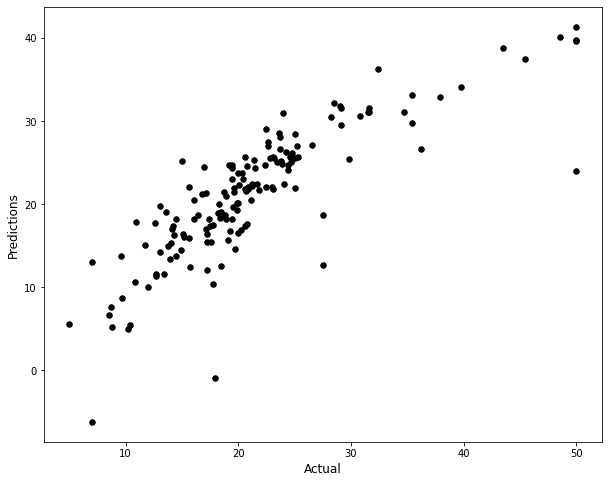

In [33]:
# display the test set target (x-axis) and test set target predictions (y-axis) in a scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(ytest, yhat2_test, color='black', s=30)
plt.xlabel("Actual", fontsize=12)
plt.ylabel("Predictions", fontsize=12);

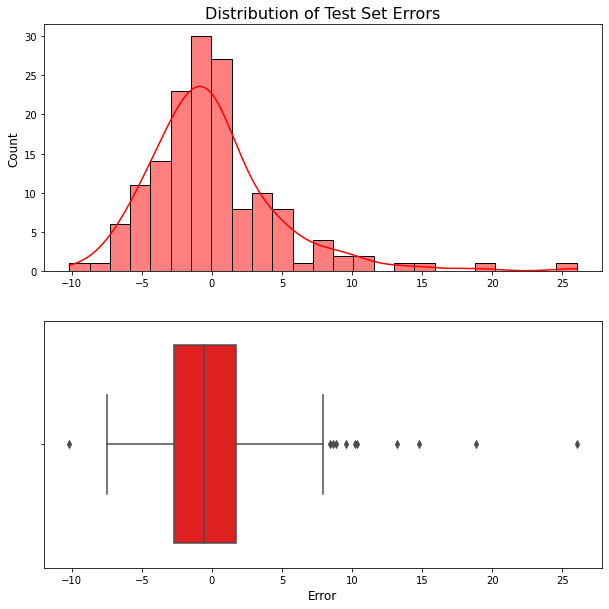

In [34]:
# plot the distribution of errors (one key assumption of linear regression is that the errors are normally distributed)
e = ytest - yhat2_test
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
sns.histplot(e, bins=25, kde=True, color='red', ax=ax1)
ax1.set_xlabel(None)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title("Distribution of Test Set Errors", fontsize=16)
sns.boxplot(x=e, color='red', ax=ax2)
ax2.set_xlabel("Error", fontsize=12);

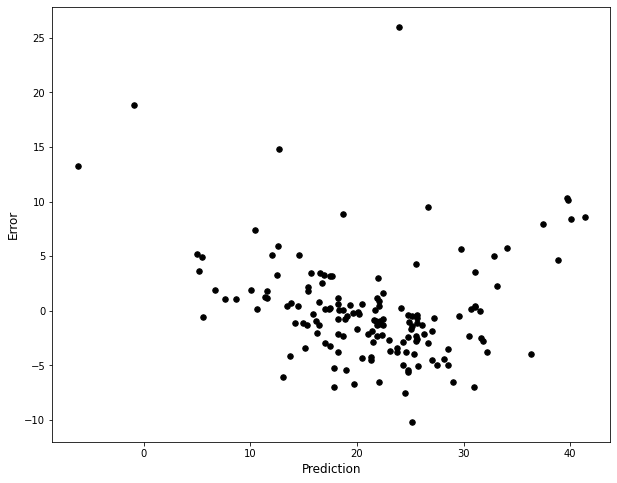

In [35]:
# display the test set predictions (x-axis) and their associated error (y-axis) in a scatterplot (this should form a uniform distribution, more or less)
plt.figure(figsize=(10, 8))
plt.scatter(yhat2_test, e, color="black", s=30)
plt.xlabel("Prediction", fontsize=12)
plt.ylabel("Error", fontsize=12);

**`Making a prediction on a new record`**

In [36]:
# step 1) create a new record; important note, new records must be 2D with shape (1, D) where D is the number of features
target = df.columns[-1]
new_record = pd.DataFrame(Xtest[0, :].reshape(1, -1), columns=df.drop(target, axis=1).columns)
print(f"New record's shape: {new_record.shape}", '\n')

# step 2) call the 'scaler' object's 'transform' method to standardize the new record
new_record_stan = scaler.transform(new_record)

# step 3) call the 'linreg_model' object's 'predict' method to make a prediction on the new record
new_prediction = linreg_model.predict(new_record_stan)
new_prediction

New record's shape: (1, 12) 



array([32.90425221])

**`Pickling the model (and its dependencies) for deployment`**

In [37]:
# mount my Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [39]:
# EXPORT workflow
# create a 'data' dictionary, which contains the 'linreg_model' and 'scaler' objects
data = {"linear_regression_model": linreg_model, 
        "standard_scaler": scaler}

# export the 'data' dictionary as a pickle file; note the "wb" string below stands for 'write-binary' mode
export_directory = r"/content/gdrive/Othercomputers/My iMac/Data_Science/ML_EndToEnd_Projects/"
file_name = r"boston_house_prices_LinearRegressionModel_StandardScaler.pkl"
with open(export_directory + file_name, "wb") as file:
  pickle.dump(data, file)

In [40]:
# IMPORT workflow
# specify the import directory
import_directory = r"/content/gdrive/Othercomputers/My iMac/Data_Science/ML_EndToEnd_Projects/"

# load in the 'boston_house_prices_LinearRegressionModel_StandardScaler.pkl' file
# note, the 'rb' string below stands for 'read-binary' mode
with open(import_directory + file_name, 'rb') as file:
  data_confirm = pickle.load(file)

# access the 'linear_regression_model' and 'standard_scaler' objects from the imported pickle file
linreg_model_confirm = data_confirm["linear_regression_model"]
scaler_confirm = data_confirm["standard_scaler"]

In [41]:
# create a new record
target = df.columns[-1]
new_record = pd.DataFrame(Xtest[100, :].reshape(1, -1), columns=df.drop(target, axis=1).columns)

# standardize the new record
new_record_stan = scaler.transform(new_record)
new_record_stan_confirm = scaler_confirm.transform(new_record)

# make a prediction on the new record
new_prediction = linreg_model.predict(new_record_stan)
new_prediction_confirm = linreg_model_confirm.predict(new_record_stan)

# confirm that the .pkl file, which contains the 'linreg_model' and 'scaler' objects, was exported and imported correctly 
print(f"Scaler confirmation: {new_record_stan == new_record_stan_confirm}", '\n')
print(f"Linear regression model confirmation: {new_prediction[0] == new_prediction_confirm[0]}")

Scaler confirmation: [[ True  True  True  True  True  True  True  True  True  True  True  True]] 

Linear regression model confirmation: True
